In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your DuckDB warehouse
conn = duckdb.connect("../data/warehouse/weather.duckdb")
print("Successful Connected")

Successful Connected


In [2]:
# Loading the data
df = conn.execute("SELECT DISTINCT * FROM weather_hourly ORDER BY timestamp").df()
df.head()

,timestamp,temperature_2m,relativehumidity_2m,precipitation,latitude,longitude,load_date
0,2025-12-03 00:00:00,12.2,95.0,0.0,-26.2041,28.0473,2025-12-03
1,2025-12-03 01:00:00,11.5,97.0,0.0,-26.2041,28.0473,2025-12-03
2,2025-12-03 02:00:00,11.1,97.0,0.0,-26.2041,28.0473,2025-12-03
3,2025-12-03 03:00:00,10.7,98.0,0.0,-26.2041,28.0473,2025-12-03
4,2025-12-03 04:00:00,11.1,97.0,0.0,-26.2041,28.0473,2025-12-03


In [3]:
# BASIC SUMMARY STATS
df.describe()

,timestamp,temperature_2m,relativehumidity_2m,precipitation,latitude,longitude,load_date
count,168,168.000000,168.000000,168.000000,1.680000e+02,1.680000e+02,168
mean,2025-12-06 11:30:00,19.371429,66.505952,0.113095,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
min,2025-12-03 00:00:00,10.700000,34.000000,0.000000,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
25%,2025-12-04 17:45:00,16.200000,48.000000,0.000000,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
50%,2025-12-06 11:30:00,18.550000,69.500000,0.000000,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
75%,2025-12-08 05:15:00,23.300000,85.250000,0.000000,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
max,2025-12-09 23:00:00,26.800000,98.000000,3.100000,-2.620410e+01,2.804730e+01,2025-12-03 00:00:00
std,NaN,4.071210,19.496966,0.399784,5.345002e-14,8.552003e-14,NaN


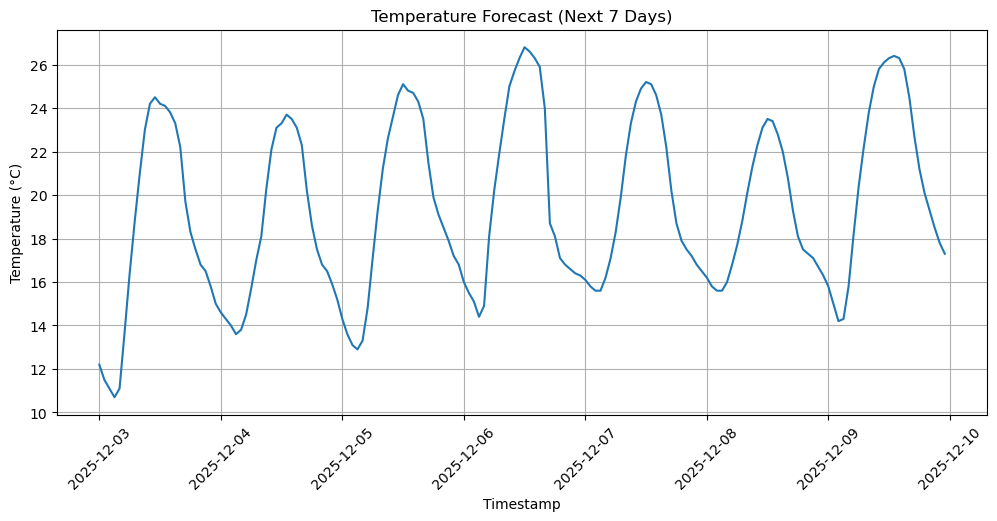

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["temperature_2m"])
plt.title("Temperature Forecast (Next 7 Days)")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

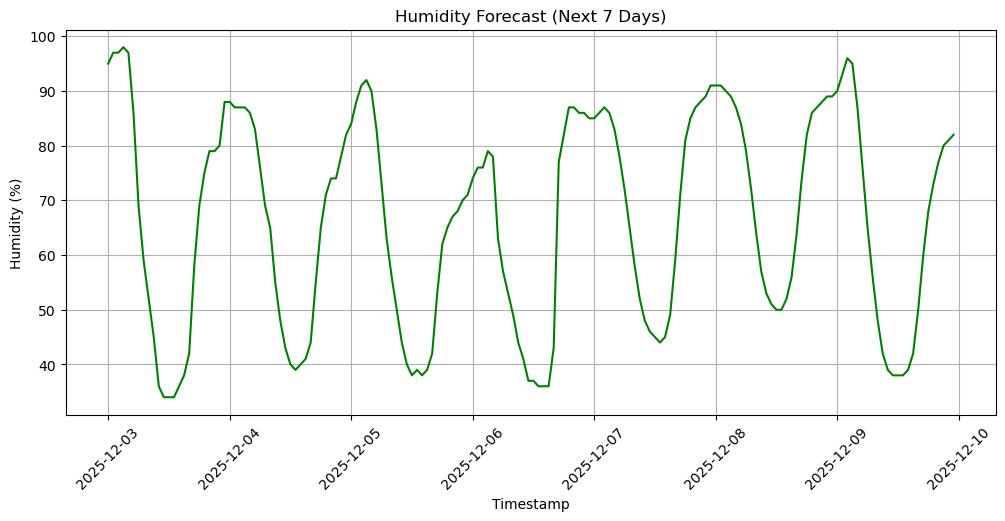

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["relativehumidity_2m"], color='green')
plt.title("Humidity Forecast (Next 7 Days)")
plt.xlabel("Timestamp")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

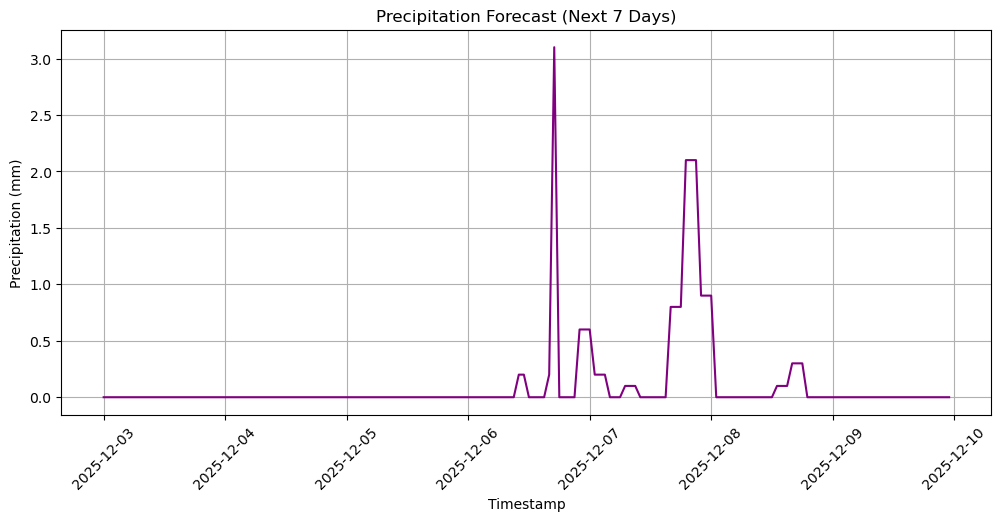

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["precipitation"], color='purple')
plt.title("Precipitation Forecast (Next 7 Days)")
plt.xlabel("Timestamp")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
daily_summary = conn.execute("""
    SELECT 
        date_trunc('day', timestamp) AS day,
        AVG(temperature_2m) AS avg_temp,
        MAX(temperature_2m) AS max_temp,
        MIN(temperature_2m) AS min_temp,
        SUM(precipitation) AS total_precipitation
    FROM weather_hourly
    GROUP BY 1
    ORDER BY 1
""").df()

daily_summary

,day,avg_temp,max_temp,min_temp,total_precipitation
0,2025-12-03,18.141667,24.5,10.7,0.0
1,2025-12-04,18.237500,23.7,13.6,0.0
2,2025-12-05,19.320833,25.1,12.9,0.0
3,2025-12-06,20.258333,26.8,14.4,4.9
4,2025-12-07,19.770833,25.2,15.6,12.0
5,2025-12-08,18.920833,23.5,15.6,2.1
6,2025-12-09,20.950000,26.4,14.2,0.0


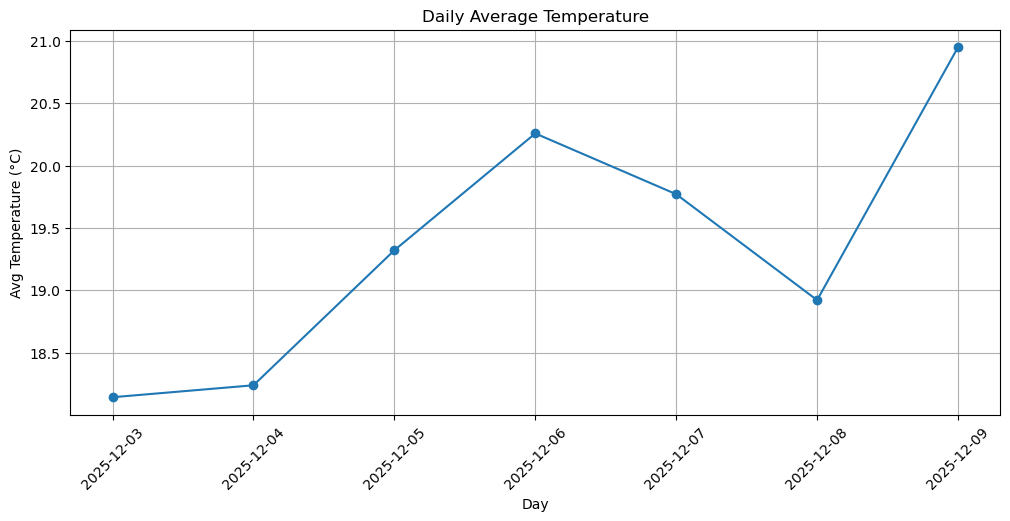

In [8]:
plt.figure(figsize=(12,5))
plt.plot(daily_summary["day"], daily_summary["avg_temp"], marker='o')
plt.title("Daily Average Temperature")
plt.xlabel("Day")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
conn.execute("""
    CREATE TABLE weather_hourly_dedup AS
    SELECT DISTINCT *
    FROM weather_hourly;
""")

conn.execute("DROP TABLE weather_hourly;")
conn.execute("ALTER TABLE weather_hourly_dedup RENAME TO weather_hourly;")

In [10]:
conn.execute("""
    SELECT 
    COUNT(*) AS total,
    COUNT(DISTINCT timestamp) AS distinct_ts,
    COUNT(DISTINCT (timestamp, latitude, longitude)) AS distinct_full_key
FROM weather_hourly;
""").df()

,total,distinct_ts,distinct_full_key
0,168,168,168


In [11]:
conn.execute("""
    SELECT 
        COUNT(*) AS total,
        COUNT(DISTINCT timestamp) AS distinct_ts,
        COUNT(DISTINCT (timestamp, latitude, longitude)) AS distinct_full_key
    FROM weather_hourly;
""").df()


,total,distinct_ts,distinct_full_key
0,168,168,168
